<a href="https://colab.research.google.com/github/skiym-aaa/practice-kaggle/blob/master/%E7%89%B9%E5%BE%B4%E9%87%8F%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%82%A2%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.8136924803591471


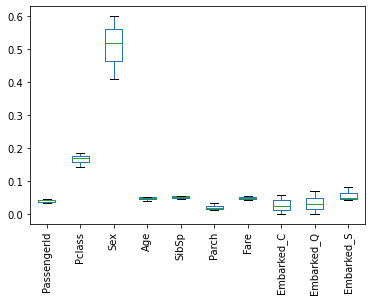

In [2]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pylab as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')


def validate(train_x, train_y):
    accuracies = []
    feature_importances = []

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    for train_idx, test_idx in cv.split(train_x, train_y):
        trn_x = train_x.iloc[train_idx, :]
        val_x = train_x.iloc[test_idx, :]

        trn_y = train_y.iloc[train_idx]
        val_y = train_y.iloc[test_idx]

        clf = xgb.XGBClassifier()
        clf.fit(trn_x, trn_y)

        pred_y = clf.predict(val_x)
        feature_importances.append(clf.feature_importances_)
        accuracies.append(accuracy_score(val_y, pred_y))
    print(np.mean(accuracies))
    return accuracies, feature_importances


def plot_feature_importances(feature_importances, cols):
    df_fimp = pd.DataFrame(feature_importances, columns=cols)
    df_fimp.plot(kind="box", rot=90)


def preprocess_df(df):
    # CabinはこのあとDropするので、コードから削除
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    
    # 列の削除
    df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
    
    # Sexの01化とEmbarkedのダミー化 
    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df


# test dataのpredict
def predict_df(train_x, train_y, test_x, df_test_raw, path_output="result.csv"):
    clf = xgb.XGBClassifier()
    clf.fit(train_x, train_y)
    preds = clf.predict(test_x)
    
    _df = pd.DataFrame()
    _df["PassengerId"] = df_test_raw["PassengerId"]
    _df["Survived"] = preds
    _df.to_csv(path_output, index=False)


# デバッグするときはmain関数から外して、直で叩く方が楽です。
def main():
    df_train = pd.read_csv("train.csv")

    # ここは前処理
    train_y = df_train["Survived"]
    train_x = df_train.drop("Survived", axis=1)

    train_x = preprocess_df(train_x)
    accuracies, feature_importances = validate(train_x, train_y)
    plot_feature_importances(feature_importances, train_x.columns)

    flag_product = True
    if flag_product:
        df_test = pd.read_csv("test.csv")
        df_test_raw = df_test.copy()
        test_x = preprocess_df(df_test)
        predict_df(train_x, train_y, test_x, df_test_raw, "result.csv")


#  `if __name__ == '__main__':` はおまじないのようなモノと思ってください。
if __name__ == '__main__':
    main()

0.8114478114478114


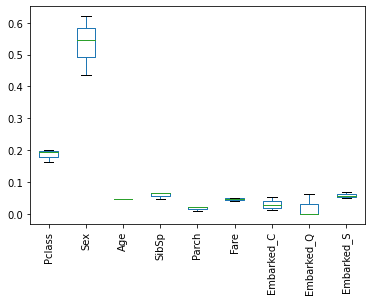

In [4]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)
    
    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df

if __name__ == '__main__':
    main()

0.8159371492704826


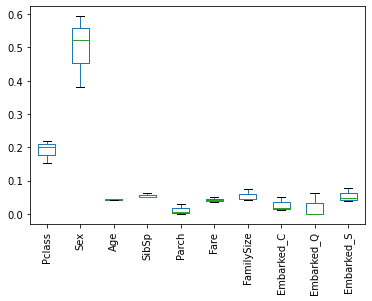

In [6]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)
    
    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)

    return df

if __name__ == '__main__':
    main()


0.8159371492704826


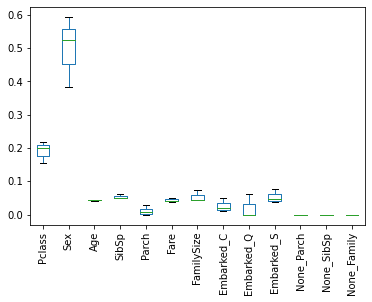

In [7]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)
    
    df["None_Parch"] = [1 if val == 0 else 0 for val in df["Parch"]]
    df["None_SibSp"] = [1 if val == 0 else 0 for val in df["SibSp"]]
    df["None_Family"] = [1 if val == 1 else 0 for val in df["FamilySize"]]

    return df

if __name__ == '__main__':
    main()

0.8159371492704826


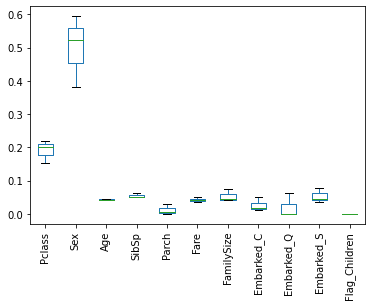

In [8]:
def preprocess_df(df):

    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
   
    df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

    df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
    df = pd.get_dummies(df)
    
    df["Flag_Children"] = [1 if val < 11 else 0 for val in df["Age"]]

    return df

if __name__ == '__main__':
    main()